# Lab 2
# Parametric regression
# ---------------------------------------------------

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li> Introduction </li>
    <li> Cross Validation </li>
    <li> Simple Linear Regression </li>
    <li> Multiple Linear Regression </li>
    <li> Non-Linear Regression </li>
    <li> Linear Regression with Regularization </li>
    <li> Comparison of the results obtained with the different models </li>
</ol>

</div>

<hr>


## 1. Introduction

Suppose you want to build a parametric regression model on a set of cases, where each case is described in terms of several variables. Without knowing anything else about the data set, give a reasoned justification:

a) Explain in your own words what is the main difference between supervised and unsupervised learning methods.  Give an example of the application of each type of method. Describe briefly the input and output variables you would consider in each example.

In an unsupervised method, you don't consider the labels in order to produce an output, only the inputs. You don't have test and training sets in unsupervised. You learn the "structure" of the data by grouping examples into consistent groups with similar characteristics.

Supervised learning aims to learn the relationship between feature vectors and the labels associated with each vector. There are two types of supervised learning:
• Regression: The set of labels is numberable, it is continuous
• Classification: The label set is not numeric, it is discrete

b) Explain in your own words the main difference between a linear and a non-linear model.

A linear model can be described by a linear equation (a polynome). It is less complex than a non-linear model. 

c)  Explain the concept of overfitting and generalization. If you wish, you can support your answer with an outline or drawing. Explain in your own words how you could get the designed model to generalize well.

Overfitting means that your model predicts too many times one class compared to what it should.

Generalizations means that your model can well predicts the class of new data according to its training. 

For the development of this second lab, the database "Pima Indian Diabetes" already pre-processed will be analyzed, where the rows of the file correspond to the cases and the columns to the variables. Important, you should use the preprocessed dataset.

For this practice, the data will be divided into two subsets: training and test. In addition, the validation scheme called k-fold cross validation will be considered.

#### Note that in this data, the goal is to predict, based on diagnostic measurements, whether a patient has diabetes. However, in this lab, we will deal with a regression task, this is, we will change the output

## 2. Cross-validatioin

For this practice, the validation scheme called k-fold cross validation will be considered. Remember that in this approach, the available cases are randomly divided into k subsets of the same size called "folds".

a) Indicate what a k-fold cross-validation scheme can be used for.

Using K fold produces more reliable results on how performs the model. It helps reduce the bias in the assessment of our model. 

b) Justify reasonably which models will need to follow a cross-validation scheme.

Complex, sensitive, high variance or low data models are more proned to follow a cross-validation scheme. 

c) As discussed in the theoretical classes, it is common in health to have a different number of cases in each class (unbalanced classes). Taking into account the database of this practice, please explain in detail the figure of merit you would consider in order to analyze the results with different parametric schemes.

If we keep the original dataset with imbalanced classes, we should avoid to use accuracy because the results would be biased if our model better generalize for one class. 
The best is to use specificity and sensitivity. 

Here what we want is not to miss any individual that has diabete (100% TP, 0% FP) and it is not really important to have FN (it will show that our model is overfitting) and we would like to have the most TN possible but it's not that important as TP. 
So we want to know precision (TP/TP+FP), sensitivity (TP/TP+FN) and specificity (TN/TN+FP)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [32]:
#Load data from csv and store it in dataframe (the proprocessed one)
data = pd.read_csv("X_resampled.csv") #We can change this database

n = 10
data.head(n)# Show the first individuals

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21
4,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30
5,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26
6,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29
7,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54
8,4,110.0,92.000000,20.536458,79.799479,37.600000,0.191,30
9,10,168.0,74.000000,20.536458,79.799479,38.000000,0.537,34


In [33]:
#Define the input and output data 
inputs = data['Age'] 
outputs = data['Glucose']
#Glucose is the dependent variable in this lab (because we are doing regression so we cannot use Outcome)

In [34]:
inputs.head() # Show the first rows of the input data

0    50
1    31
2    32
3    21
4    30
Name: Age, dtype: int64

In [35]:
outputs.head() # Show the first rows of the output data

0    148.0
1     85.0
2    183.0
3     89.0
4    116.0
Name: Glucose, dtype: float64

In [36]:
print(data.size)

7616


In [37]:
# Define the Train (70% of the samples) and Test sets (30% of the samples) - tip: train_test_split
# Please, use the option random state to obtain always the same results
# For more details, check: https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html
from sklearn.model_selection import train_test_split 
inputs = np.array(inputs).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=0)

In [38]:
print(X_train.shape)

(666, 1)


In [39]:
print(Y_train.shape)

(666,)


In [40]:
Y_train

358    109.000000
424    100.000000
116    105.000000
76     137.000000
48     150.000000
          ...    
835    127.681192
192     96.000000
629    165.000000
559    188.000000
684     92.000000
Name: Glucose, Length: 666, dtype: float64

We will need arrays for computation so let's create them

In [41]:
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
Y_train_array = np.array(Y_train)
Y_test_array = np.array(Y_test)

#### Define variables forthe following figure of merits:  R^2, MAE, MSE and RMSE

In [42]:
# Below you can find some examples:
r2_results=[]
mse_results=[]

## 3. Simple Linear Regression

Linear regression allows us to establish the relationship between the input and the output. This technique is used when the relationship between the variables is linear. 

Indicate:

a) What is the output (dependent) variable that you could consider to address a linear regression problem?

b) Indicate whether the performance obtained in the test set change after normalizing the variables.



In [43]:
from sklearn import model_selection   
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Simple linear regression - Tip: LinearRegression()
regr = LinearRegression() # Create linear regression object

regr.fit(X_train_array, Y_train_array) # Train the model using the training set, consider the feature 'Age' as the input and Glucose as the output

# Show the intercept
print("Interception: \n",regr.intercept_)

# Show the coeffients
print("Coefficients: \n", regr.coef_)

# Predict using the test set
age_y_pred = regr.predict(X_test)

# Compute R2, MAE, MSE and RMSE
mse = mean_squared_error(Y_test, age_y_pred)
r_squared = r2_score(Y_test, age_y_pred)

print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')



Interception: 
 101.47305318841143
Coefficients: 
 [0.55969083]
R Squared: 0.06472377361881165 
 Mean Squared Error:881.5633136469366


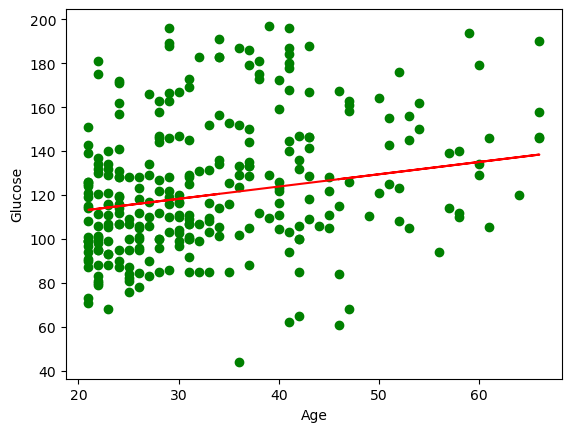

In [44]:
# Plot the samples and the predict
plt.scatter(X_test,Y_test,color='g')
plt.plot(X_test, age_y_pred,color='r')
plt.xlabel('Age')
plt.ylabel("Glucose")
plt.show()

### Using normalization

In [45]:
# Normalize using StandardScaler() - Important, note that you have two sets train and test
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

# Remember, Standardization puts means to 0 and std to 1 but not values between 0 and 1! 

scalerfit = scaler1.fit(X_train)
X_train= scalerfit.transform(X_train)
X_test= scalerfit.transform(X_test)
Y_test= scalerfit.transform(Y_test)
Y_train= scalerfit.transform(Y_train)

X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
Y_train_array = np.array(Y_train)
Y_test_array = np.array(Y_test)


In [46]:
print("Now mean is:", np.mean(X_train), "and std is:", np.std(X_train))
print("Min: ", np.min(X_train_array), "and max is:", np.max(X_train_array))

Now mean is: 2.400482215405744e-16 and std is: 1.0
Min:  -1.149911103627187 and max is: 3.150509131228036


In [47]:
# Build a simple linear regression model and show the prediction results in the test sets based on R2, MAE, MSE and RMSE
regr = LinearRegression() # Create linear regression object

regr.fit(X_train, Y_train) # Train the model using the training set, consider the feature 'Age' as the input and the output

# Show the intercept
print("Interception: \n",regr.intercept_)

# Show the coeffients
print("Coefficients: \n", regr.coef_)

# Predict using the test set
age_y_pred = regr.predict(X_test)

# Compute R2, MAE, MSE and RMSE
mse = mean_squared_error(Y_test, age_y_pred)
r_squared = r2_score(Y_test, age_y_pred)
print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')

Interception: 
 [7.93225737]
Coefficients: 
 [[0.55969083]]
R Squared: 0.06472377361881165 
 Mean Squared Error:7.380394663759312


It does not change a lot the results because it is with only one feature

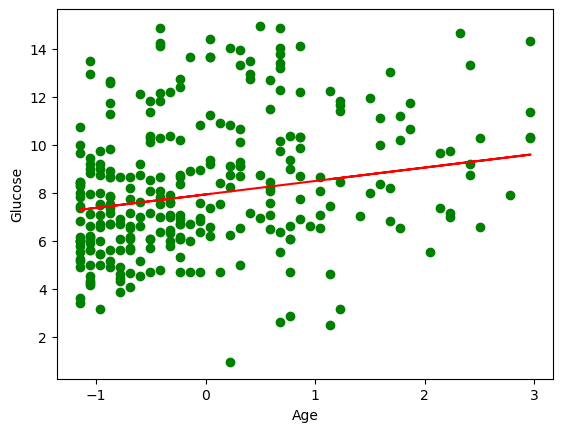

In [48]:
# Plot the samples and the predict
plt.scatter(X_test,Y_test,color='g')
plt.plot(X_test, age_y_pred,color='r')
plt.xlabel('Age')
plt.ylabel("Glucose")
plt.show()

## 4. Multiple Linear Regresion

In this section we will analyze:

a) How the value of the estimators, the correlation coefficient and the figure of merit change when we change the number of explanatory variables.

b) The most relevant feautures. Explain in detail the process you have followed and justify which features are most relevant in this database.

We chose the 3 features which had the highest correlation coefficient with 'Glucose' : 'Age', 'Insulin', 'BMI' (see Lab1)

Note: you may have to repeat this section with a different number of variables in order to draw valid conclusions.

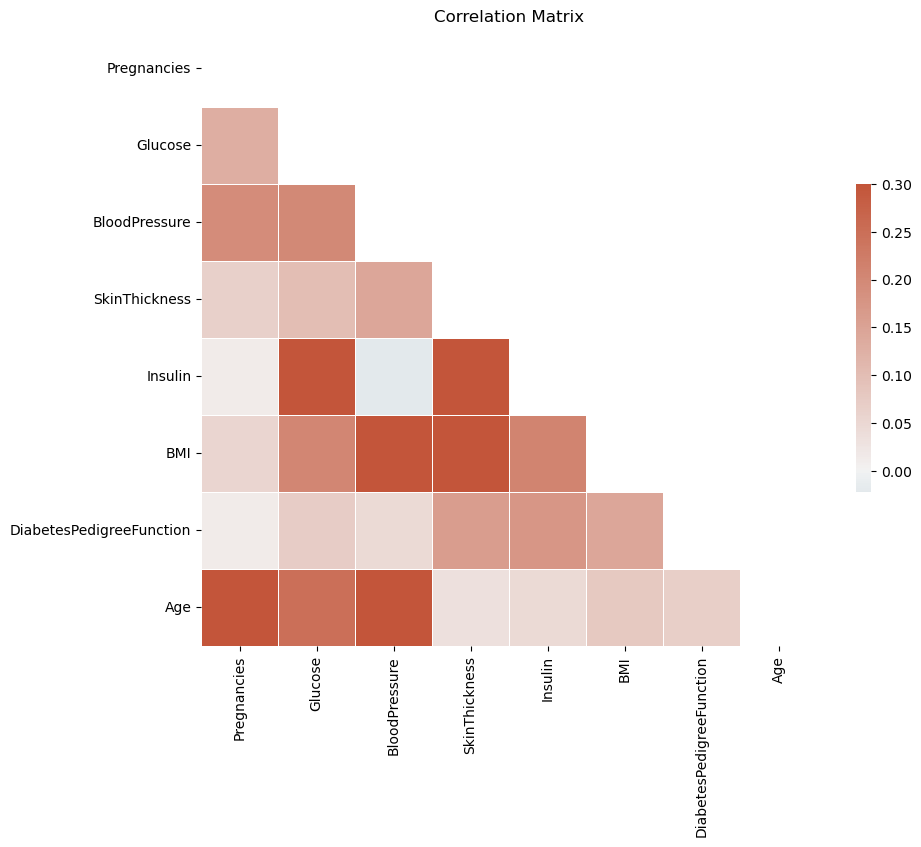

In [49]:
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix")
plt.show()

In [50]:
# Build a simple linear regression model and show the prediction results in the test sets based on R2, MAE, MSE and RMSE
K = 3
inputs = data.loc[:, ['BMI', 'Insulin', 'Age']]
#inputs = np.array(inputs).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=0) # splitting

# normalize
scaler = StandardScaler()
scalerfit = scaler.fit(X_train)
X_train= scalerfit.transform(X_train)
X_test= scalerfit.transform(X_test)


In [51]:
# Show and plot the values of the coefficients. Comment the results
regr = LinearRegression() # Create linear regression object

regr.fit(X_train, Y_train) 

# Show the intercept
print("Interception: \n",regr.intercept_)

# Show the coeffients
print("Coefficients: \n", regr.coef_)

# Predict using the test set
y_pred = regr.predict(X_test)

# Compute R2, MAE, MSE and RMSE
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)
print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')

Interception: 
 120.26051294233521
Coefficients: 
 [3.17677604 8.71420379 5.36258244]
R Squared: 0.20647981639120605 
 Mean Squared Error:747.9483202674552


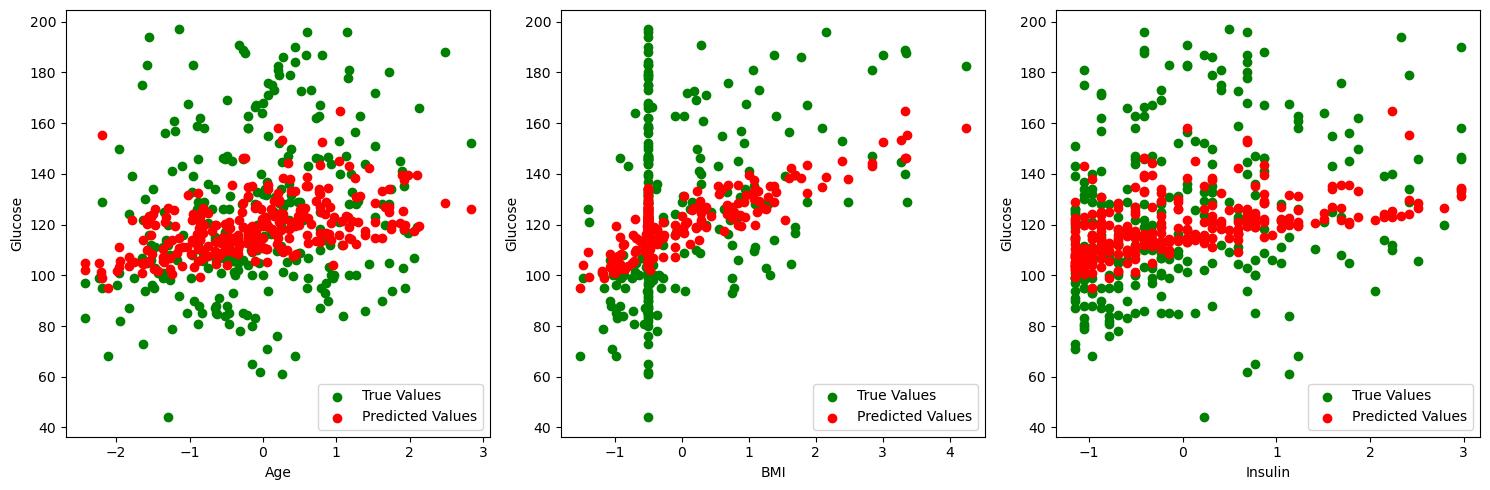

In [52]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Age vs. Glucose
axes[0].scatter(X_test[:, 0], Y_test, color='g', label='True Values')
axes[0].scatter(X_test[:, 0], y_pred, color='r', label='Predicted Values')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Glucose')
axes[0].legend()

# Plot BMI vs. Glucose
axes[1].scatter(X_test[:, 1], Y_test, color='g', label='True Values')
axes[1].scatter(X_test[:, 1], y_pred, color='r', label='Predicted Values')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Glucose')
axes[1].legend()

# Plot Insulin vs. Glucose
axes[2].scatter(X_test[:, 2], Y_test, color='g', label='True Values')
axes[2].scatter(X_test[:, 2], y_pred, color='r', label='Predicted Values')
axes[2].set_xlabel('Insulin')
axes[2].set_ylabel('Glucose')
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### 4 features as inputs

In [53]:
# Build a simple linear regression model and show the prediction results in the test sets based on R2, MAE, MSE and RMSE
K = 4
inputs = data.loc[:, ['BMI', 'Insulin', 'Age', 'BloodPressure']]
#inputs = np.array(inputs).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=0) # splitting

# normalize
scaler = StandardScaler()
scalerfit = scaler.fit(X_train)
X_train= scalerfit.transform(X_train)
X_test= scalerfit.transform(X_test)


In [54]:
# Show and plot the values of the coefficients. Comment the results
regr = LinearRegression() # Create linear regression object

regr.fit(X_train, Y_train) 

# Show the intercept
print("Interception: \n",regr.intercept_)

# Show the coeffients
print("Coefficients: \n", regr.coef_)

# Predict using the test set
y_pred = regr.predict(X_test)

# Compute R2, MAE, MSE and RMSE
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)
print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')

Interception: 
 120.26051294233521
Coefficients: 
 [2.10908109 9.10099562 4.27875847 3.37219418]
R Squared: 0.21181004043825824 
 Mean Squared Error:742.9242109820292


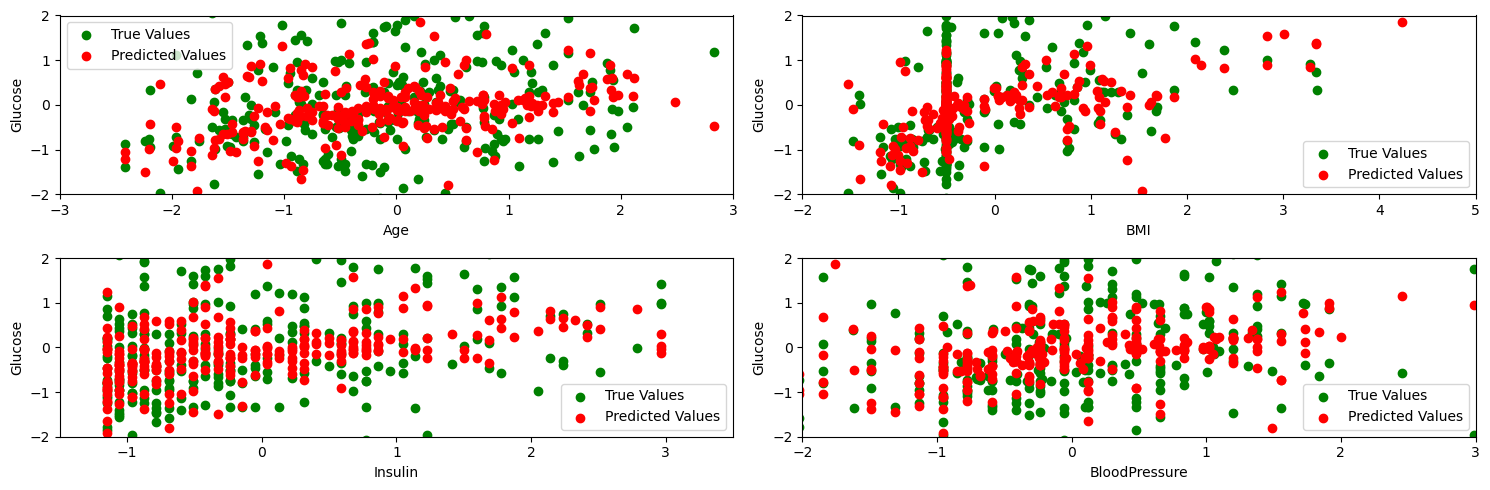

In [74]:
def plot_multi_pred(y_pred, Y_test, X_test):
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 5))

    # Plot Age vs. Glucose
    axes[0, 0].scatter(X_test[:, 0], Y_test, color='g', label='True Values')
    axes[0, 0].scatter(X_test[:, 0], y_pred, color='r', label='Predicted Values')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Glucose')
    axes[0, 0].set_xlim([-3, 3])
    axes[0, 0].set_ylim([-2, 2])
    axes[0, 0].legend()

    # Plot BMI vs. Glucose
    axes[0, 1].scatter(X_test[:, 1], Y_test, color='g', label='True Values')
    axes[0, 1].scatter(X_test[:, 1], y_pred, color='r', label='Predicted Values')
    axes[0, 1].set_xlabel('BMI')
    axes[0, 1].set_ylabel('Glucose')
    axes[0, 1].set_xlim([-2, 5])
    axes[0, 1].set_ylim([-2, 2])    
    axes[0, 1].legend()

    # Plot Insulin vs. Glucose
    axes[1, 0].scatter(X_test[:, 2], Y_test, color='g', label='True Values')
    axes[1, 0].scatter(X_test[:, 2], y_pred, color='r', label='Predicted Values')
    axes[1, 0].set_xlabel('Insulin')
    axes[1, 0].set_ylabel('Glucose')
    axes[1, 0].set_xlim([-1.5, 3.5])
    axes[1, 0].set_ylim([-2, 2])
    axes[1, 0].legend()

    # Plot BloodPressure vs. Glucose
    axes[1, 1].scatter(X_test[:, 3], Y_test, color='g', label='True Values')
    axes[1, 1].scatter(X_test[:, 3], y_pred, color='r', label='Predicted Values')
    axes[1, 1].set_xlabel('BloodPressure')
    axes[1, 1].set_ylabel('Glucose')
    axes[1, 1].set_xlim([-2, 3])
    axes[1, 1].set_ylim([-2, 2])
    axes[1, 1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()
    
plot_multi_pred(y_pred, Y_test, X_test)

We reduced the MSE from 747 to 742. It was 882 with only one feature. We can see that our models does not well predict the Glucose value for outliers. 

# Use stastsmodels and compare the results

## Multi regression

In [56]:
# Normalize using StandardScaler() - Important, note that you have two sets train and test
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

# Remember, Standardization puts means to 0 and std to 1 but not values between 0 and 1! 
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

# Remember, Standardization puts means to 0 and std to 1 but not values between 0 and 1! 

scalerfit = scaler1.fit(X_train)
X_train= scalerfit.transform(X_train)
X_test= scalerfit.transform(X_test)

scalerfit = scaler1.fit(Y_train) # Outputs have to be normalized too!!
Y_train= scalerfit.transform(Y_train)
Y_test= scalerfit.transform(Y_test)

import statsmodels.api as sm
mod = sm.OLS(Y_train, X_train)

res = mod.fit()
y_pred = res.predict(X_test)

# Compute R2, MAE, MSE and RMSE
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)
print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')

R Squared: 0.21181004043825824 
 Mean Squared Error:1.048489234756201


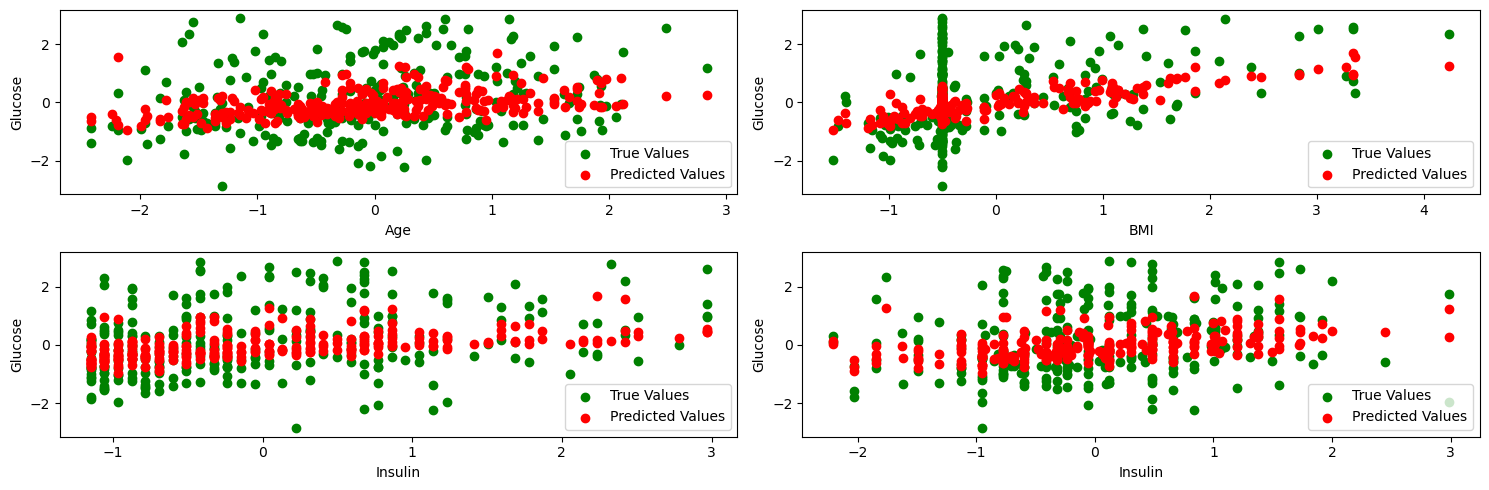

In [68]:
   
plot_multi_pred(y_pred, Y_test, X_test)

## 5. Non-linear regression


Many of the relationships between variables we study are non-linear. As we have seen in theory, we can highlight the functions logarithmic, inverse, quadratic, cubic, power, exponential, etc.

a) Include which non-linear functions best fit the available data.

b) Indicate whether the performance obtained in the test set changes after normalizing the variables.


In [90]:
from sklearn.preprocessing import PolynomialFeatures
# Define the degree of the polynomial
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit

# Define a range of polynomial degrees to try
degrees = [1, 2, 3, 4, 5]

# Initialize an empty list to store cross-validation scores
cv_scores = []

for degree in degrees:
    # Create a pipeline that includes polynomial features and linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0) # perform the 3-fold, no need to use KFold
    
    # Perform 3-fold cross-validation
    cv_score = cross_val_score(model, inputs, outputs, cv=cv, scoring='r2').mean() # or neg_mean_squared_error

    # Append the cross-validation score to the list
    cv_scores.append(cv_score)

# Find the best degree based on cross-validation scores
best_degree = degrees[cv_scores.index(max(cv_scores))]

# Print the results
print(f'Cross-validation scores for different degrees: {cv_scores}')
print(f'Best degree: {best_degree}')



Cross-validation scores for different degrees: [0.21050446145395854, 0.2091283039647804, -0.3123805916572893, -0.5143685025001301, -12.050373232413099]
Best degree: 1


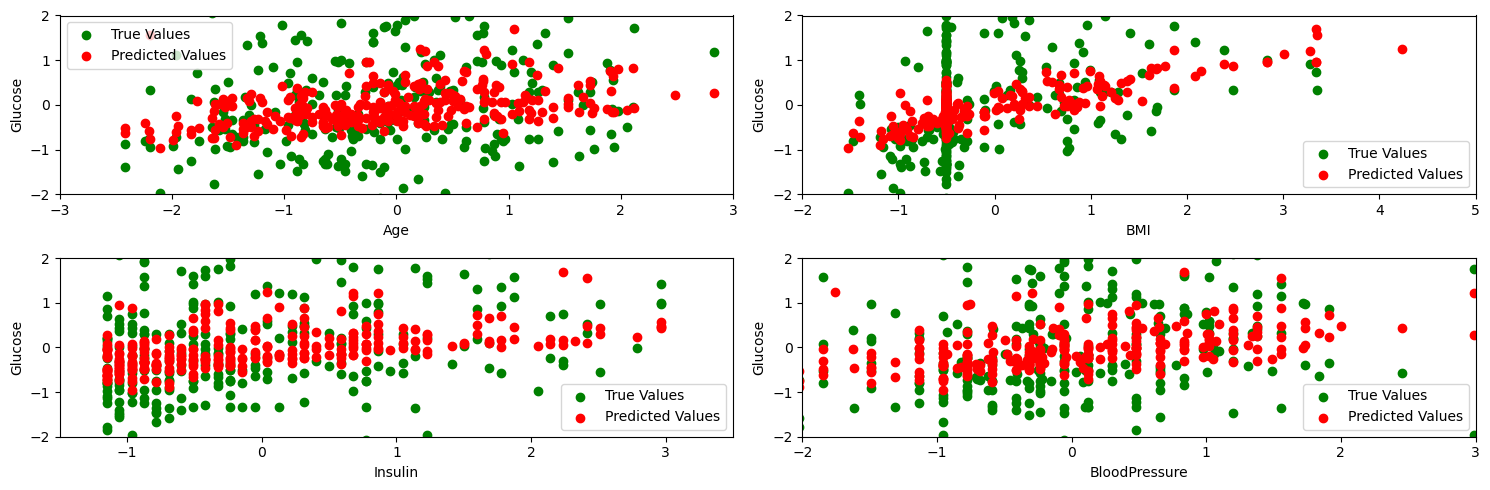

Polynomial Regression with degree 1


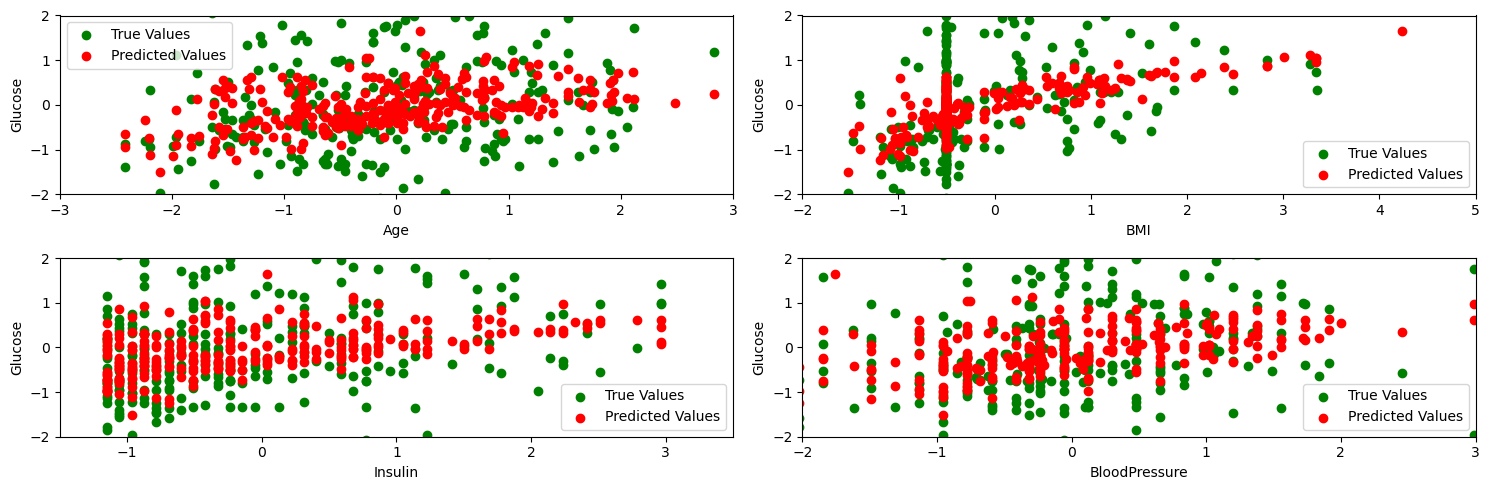

Polynomial Regression with degree 2


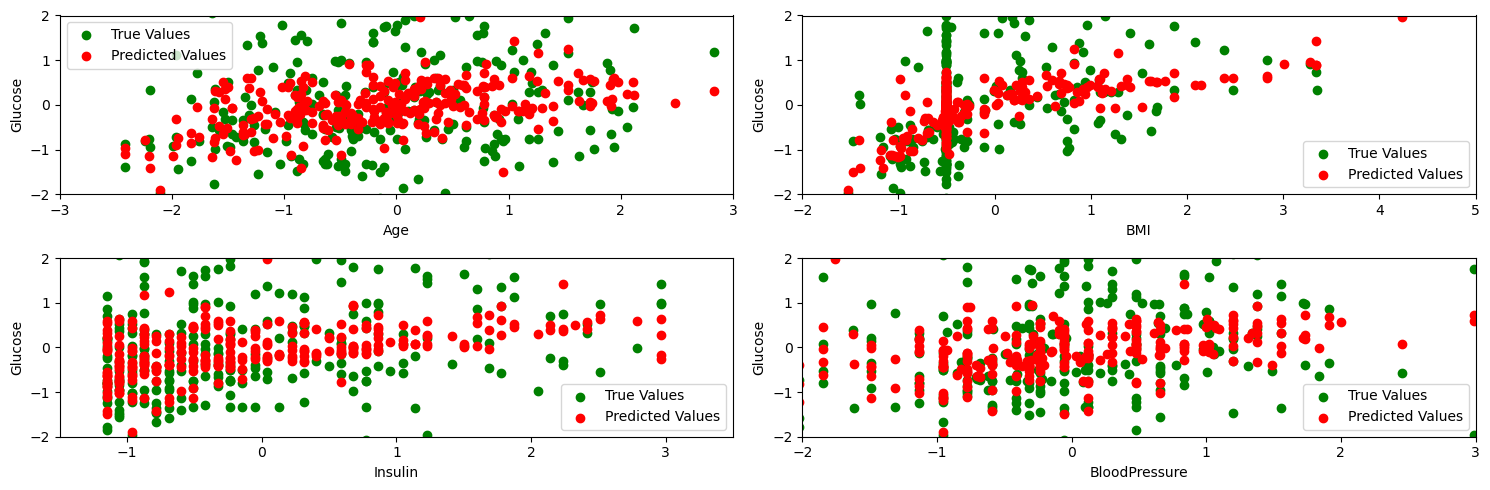

Polynomial Regression with degree 3


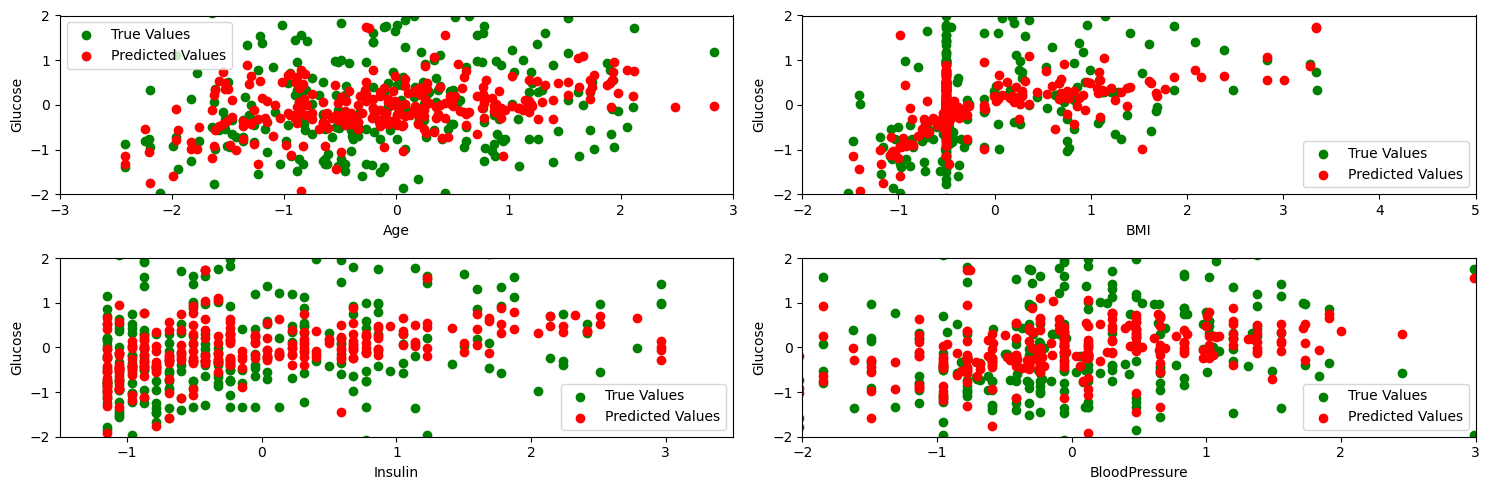

Polynomial Regression with degree 4


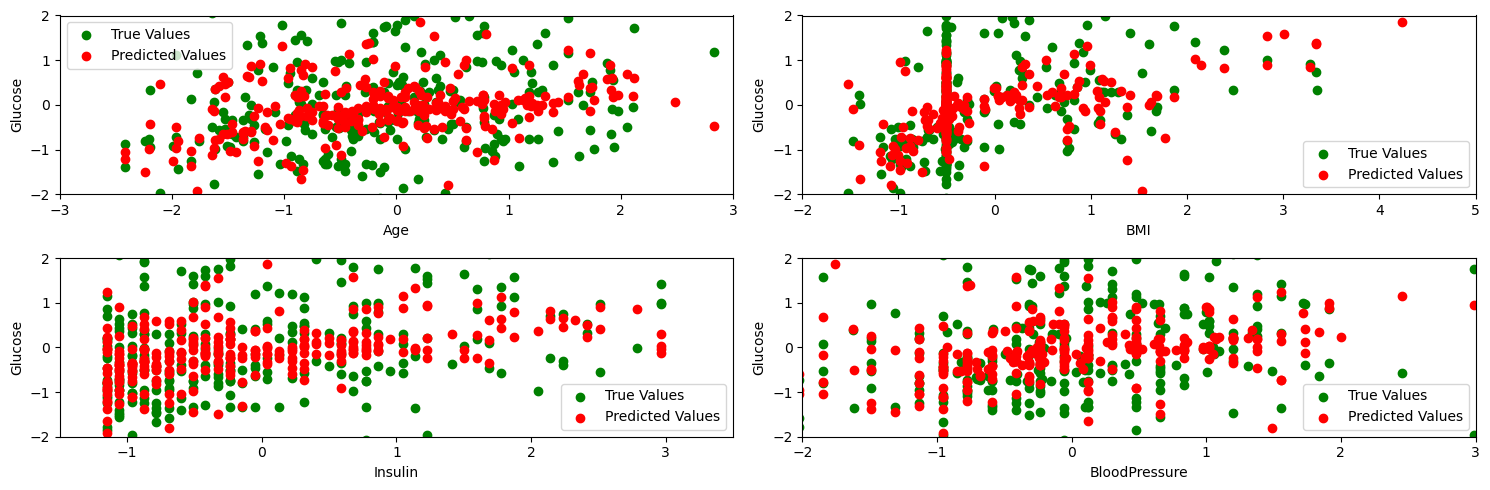

Polynomial Regression with degree 5


In [75]:
for degree in degrees:
    # Create a pipeline with polynomial features and linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Fit the model on the entire dataset (for simplicity in this example)
    model.fit(X_train, Y_train)
    
    # Predict using the model
    y_pred = model.predict(X_test)
    
    plot_multi_pred(y_pred, Y_test, X_test)
    print(f'Polynomial Regression with degree {degree}')

In [60]:
def poly_reg(degree):
    poly_reg = PolynomialFeatures(degree)

    # Transform the features for both training and testing sets
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    # Fit a linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, Y_train)

    # Predict using the transformed features
    y_pred = lin_reg.predict(X_test_poly)

    # Compute R2, MAE, MSE, and RMSE
    mse = mean_squared_error(Y_test, y_pred)
    r_squared = r2_score(Y_test, y_pred)
    
    return mse, r_squared


In [61]:
r_squared4, mse4 = poly_reg(4)
print(f'R Squared: {r_squared} \nMean Squared Error: {mse}')


R Squared: 0.21181004043825824 
Mean Squared Error: 1.048489234756201


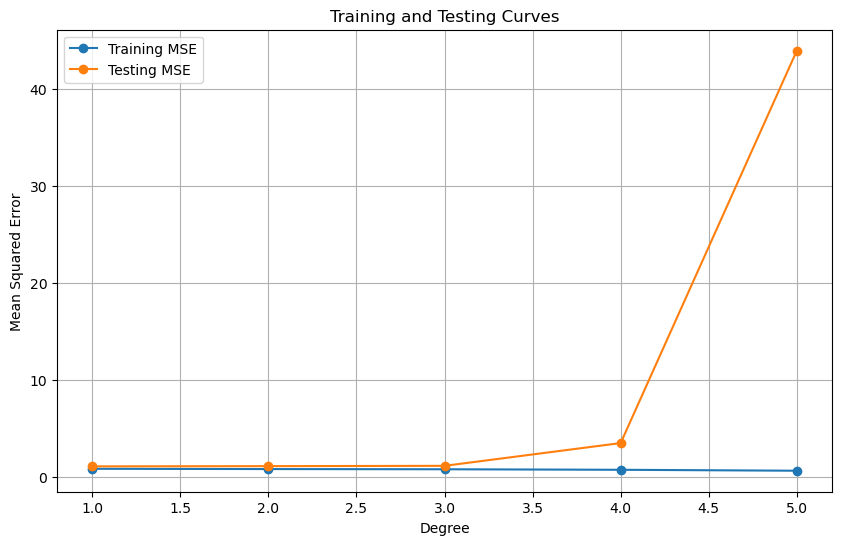

Min MSE: 1.048489234756201 Degree: 1
Max r2: 0.21181004043825824 Degree: 1


In [89]:
# Use cross validation for finding the degree, train and predict with the best degree. Compute R2, MAE, MSE, RMSE.
# IMPORTANT:  plot the train and the validations curve and analyze them.

train_mse_poly = []  # List to store training MSE
test_mse_poly = []   # List to store testing MSE
train_r2_poly = []  # List to store training R2
test_r2_poly = []   # List to store testing R2


for degree in degrees:
    # Create polynomial features and fit the model
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    # Calculate MSE for training set
    y_train_pred = model.predict(X_train_poly)
    train_mse_poly.append(mean_squared_error(Y_train, y_train_pred))
    
    # Calculate MSE for testing set
    y_test_pred = model.predict(X_test_poly)
    test_mse_poly.append(mean_squared_error(Y_test, y_test_pred))
    
    # calculate R2 for training set
    train_r2_poly.append(r2_score(Y_train, y_train_pred))
    test_r2_poly.append(r2_score(Y_test, y_test_pred))

# Plot the training and test curves
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse_poly, label='Training MSE', marker='o')
plt.plot(degrees, test_mse_poly, label='Testing MSE', marker='o')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Curves')
plt.legend()
plt.grid(True)
plt.show()

print("Min MSE:", min(test_mse_poly), "Degree:", degrees[test_mse_poly.index(min(test_mse_poly))])
print("Max r2:", max(test_r2_poly), "Degree:", degrees[test_r2_poly.index(max(test_r2_poly))])

## 6. Linear regression with regularization

a) Indicate whether the performance obtained in the test set changes when changing the regularization considered.

b) Justify which features are more relevant for these models

In [85]:
# Use a Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

# Values for alpha
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}

# Use grid search for ridge regression and then train and predict
svc = Ridge()
clf = GridSearchCV(svc, parameters, cv=cv)# cv allows to define the cross-validation splitting strategy
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

# Which is the best value of the regularization parameter?
print("Best parameter: ", clf.best_params_)

# provide R2, MAE, MSE, RMSE values
mse_ridge = mean_squared_error(Y_test, y_pred)
r_squared_ridge = r2_score(Y_test, y_pred)

print(f'R Squared: {r_squared_ridge} \nMean Squared Error: {mse_ridge}')



Best parameter:  {'alpha': 1e-15}
R Squared: 0.21181004043825824 
Mean Squared Error: 1.048489234756201


In [87]:
# Use a Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso_regression = Lasso()

# Values for alpha
parameters = {"alpha":[1e-4, 0.01, 1, 5, 10, 20]}

svc = Lasso()

clf = GridSearchCV(svc, parameters, cv=cv) # cv allows to define the cross-validation splitting strategy
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

# Which is the best value of the regularization parameter?
print("Best parameter: ", clf.best_params_) 

# provide R2, MAE, MSE, RMSE values
mse_lasso = mean_squared_error(Y_test, y_pred)
r_squared_lasso = r2_score(Y_test, y_pred)

print(f'R Squared: {r_squared_lasso} \nMean Squared Error: {mse_lasso}')

Best parameter:  {'alpha': 0.0001}
R Squared: 0.21178120707567982 
Mean Squared Error: 1.0485275903199816


### Questions
Is it normal that the correlation between the variable is so low (0.3)? 
Is it normal to have R² values of 0,2? Maybe that I have bad inputs

## 6. Comparison of the results obtained with the different models


Provide in a table the performance measures  obtained both in the validation and test set  by the different models designed.

In view of the results obtained, please answer, if possible, the following questions:

a) Justify whether the fact of normalizing the feature's values influence the results obtained.

b) Reasonably justify whether you would use a linear or non-linear parametric scheme. Indicate and justify the scheme that provides the best performance in the set of tests.

c) Indicate and justifiy which are the most relevant feautures as well as the procedure to identify them.

d) Indicate and justify  whether the fact of making a single partition of the cases in the training and test sets can influence the results obtained. Starting from the original data, make a new partition of the cases in the training and test sets. Select one of the analyzed models (indicate the chosen models) and obtain again the figures of merti. Comment the obtained results. 

In [65]:
# Tips, you should provide a table similar as the one provided here

results = pd.DataFrame()

results["R2 in the test set"] = r2_results
results["MSE in the test set"] = mse_results

#results
results["Models"] = ["Linear Regression (LR) ", "LR Normalized", "Multiple LR Normalized", "Non-LR Normalized", "Rigde", "Lasso"]
results.set_index("Models", inplace = True)


In [66]:
results

,R2 in the test set,MSE in the test set
Models,,
Linear Regression (LR),NaN,NaN
LR Normalized,NaN,NaN
Multiple LR Normalized,NaN,NaN
Non-LR Normalized,NaN,NaN
Rigde,NaN,NaN
Lasso,NaN,NaN
